# DEMO: JKI and JKI-CODE-DE DataCubes
## PHASE, precipitation, and Soil-adjusted vegetation index (SAVI from Sentinel-2)

### necessary packages 

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # numeric python
import geopandas as gpd # handling geovector data
import pprint # print function for human-readable outputs
from tqdm import tqdm # progress bar

from func_misc import * # some additional defined functions

### credentials from credentials.py

In [2]:
import credentials # ---> this is the credentials.py

if credentials.ras_cde_pw == '' or credentials.ras_pw == '':
    print("It's possible that some of the following functions might not work without credentials, or you may only have limited access.\n Please check crdentials.py.")
else:
    print('credentials set!')

credentials set!


In [3]:
print('host adress of the JKI Data Cube: ', credentials.ras_host)

host adress of the JKI Data Cube:  https://datacube.julius-kuehn.de/flf/ows


# Get a list of all available data cubes
with credentials also possible to see restricted data cubes

In [4]:
list_of_datacubes = get_coverages(
    host=credentials.ras_host,
    user=credentials.ras_user,
    pw=credentials.ras_pw,
    use_credentials=False
)
print('available data cubes n={} :\n'.format(len(list_of_datacubes)))

pprint.pprint(list_of_datacubes)

available data cubes n=79 :

['DWD_Niederschlag',
 'DWD_Niederschlag_HYRAS',
 'DWD_Temp_Max',
 'DWD_Temp_Min',
 'DWD_Temp_Tagesmittel',
 'Dummy_A',
 'Dummy_B',
 'Dummy_C',
 'Dummy_D',
 'MODIS',
 'PHASE_201_Dauergruenland',
 'PHASE_201_Dauergruenland_daily',
 'PHASE_202_Winterweizen',
 'PHASE_202_Winterweizen_daily',
 'PHASE_202_Winterweizen_test',
 'PHASE_202_Winterweizen_test1',
 'PHASE_203_Winterroggen',
 'PHASE_203_Winterroggen_daily',
 'PHASE_204_Wintergerste',
 'PHASE_204_Wintergerste_daily',
 'PHASE_205_Winterraps',
 'PHASE_205_Winterraps_daily',
 'PHASE_208_Hafer',
 'PHASE_208_Hafer_daily',
 'PHASE_215_Mais',
 'PHASE_215_Mais_daily',
 'PHASE_252_Futter_Ruebe',
 'PHASE_252_Futter_Ruebe_daily',
 'PHASE_253_ZuckerRuebe',
 'PHASE_253_ZuckerRuebe_daily',
 'PHASE_311_Apfel',
 'PHASE_311_Apfel_daily',
 'PHASE_313_Apfel',
 'PHASE_313_Apfel_daily',
 'dwd_eminX1kmXdynawi_daily',
 'dwd_pawX1kmXdynawi_daily',
 'dwd_pawXcult001X1kmXdynawi_daily',
 'dwd_pawcrdXcult001X1kmXdynawi_daily',
 'dwd

# Get metadata of given data cube
with credentials also possible to see restricted data cubes

In [5]:
datacube_layer = list_of_datacubes[0]
datacube_layer

'DWD_Niederschlag'

In [6]:
metadata = get_metadata_from_datacube(
    layer=datacube_layer,
    host=credentials.ras_host,
    user=credentials.ras_user,
    pw=credentials.ras_pw,
    use_credentials=False
)
print('meta data of data cube {}:\n'.format(datacube_layer))
pprint.pprint(metadata)


meta data of data cube DWD_Niederschlag:

{'wcs:CoverageDescriptions': {'@xmlns:gml': 'http://www.opengis.net/gml/3.2',
                              '@xmlns:gmlcov': 'http://www.opengis.net/gmlcov/1.0',
                              '@xmlns:ows': 'http://www.opengis.net/ows/2.0',
                              '@xmlns:rasdaman': 'http://www.rasdaman.org',
                              '@xmlns:swe': 'http://www.opengis.net/swe/2.0',
                              '@xmlns:wcs': 'http://www.opengis.net/wcs/2.0',
                              '@xmlns:xlink': 'http://www.w3.org/1999/xlink',
                              '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
                              '@xsi:schemaLocation': 'http://www.opengis.net/wcs/2.0 '
                                                     'http://schemas.opengis.net/wcs/2.0/wcsDescribeCoverage.xsd',
                              'wcs:CoverageDescription': {'@gml:id': 'DWD_Niederschlag',
                            

# Example Winter Wheat field in 2020

In [7]:
# directory to shape file of agricultural field'
shp = 'Vector/winterwheat2020.shp'

In [8]:
### shows vector in an interactive map
## works only if you installed ipyleaflet
get_map(shp, zoom=15)

Map(center=[52.20607611445891, 10.39525994822609], controls=(ZoomControl(options=['position', 'zoom_in_text', …

# Collecting PHASE data from JKI DataCube

Citataion of PHASE data:  
Möller, M., Boutarfa, L., & Strassemeyer, J. (2020). PhenoWin – An R Shiny application for visualization and extraction of phenological windows in Germany. Computers and Electronics in Agriculture, 175, 105534. https://doi.org/10.1016/j.compag.2020.105534

available crop types / layer names: ['corn','grassland','winterwheat','winterrye','winterbarley','winterrape','winteroat','fodderbeet','sugarbeet','apple']

In [9]:
# function to request PHASE data using WCS query
from func_datacube_PHASE import get_phases_from_point

In [10]:
%%time
print('Potential starting dates of phenological phases for winter wheat:\n')
# get centroid coodinates from field
easting = float(gpd.read_file(shp).to_crs('EPSG:32632').centroid.x)
northing = float(gpd.read_file(shp).to_crs('EPSG:32632').centroid.y)

# phenological phases for winter wheat
p_names = ['shooting','heading', 'milk ripening','yellow ripening','harvest', 'sowing', 'emergence']

# get phases from previous year
year_pre = '2019'
days_pre = get_all_dates(year_pre)

# wcs request:
phases_pre = get_phases_from_point(
    year=year_pre,
    crop='winterwheat',
    easting=easting,
    northing=northing,
    epsg=32632,
    host=credentials.ras_host,
    printout=False,
    get_query=False
)

# print result for previous year (sowing and emegrence)
for i in range(-2,0):
    print('{} started on DOY {} in year {}'.format(p_names[i], int(phases_pre[i]), year_pre))

# get phases from ongoing year
year_on = '2020'    
days_on= get_all_dates(year_on)

# wcs request:
phases_on = get_phases_from_point(
    year=year_on,
    crop='winterwheat',
    easting=easting,
    northing=northing,
    epsg=32632,
    host=credentials.ras_host,
    printout=False,
    get_query=False
)

# print result for ongoing year (shooting - harvest)
for i in range(0,5):
    print('{} started on DOY {} in year {}'.format(p_names[i], int(phases_on[i]), year_on))


Potential starting dates of phenological phases for winter wheat:

sowing started on DOY 277 in year 2019
emergence started on DOY 291 in year 2019
shooting started on DOY 106 in year 2020
heading started on DOY 144 in year 2020
milk ripening started on DOY 175 in year 2020
yellow ripening started on DOY 192 in year 2020
harvest started on DOY 206 in year 2020
CPU times: user 198 ms, sys: 4.03 ms, total: 202 ms
Wall time: 1.08 s


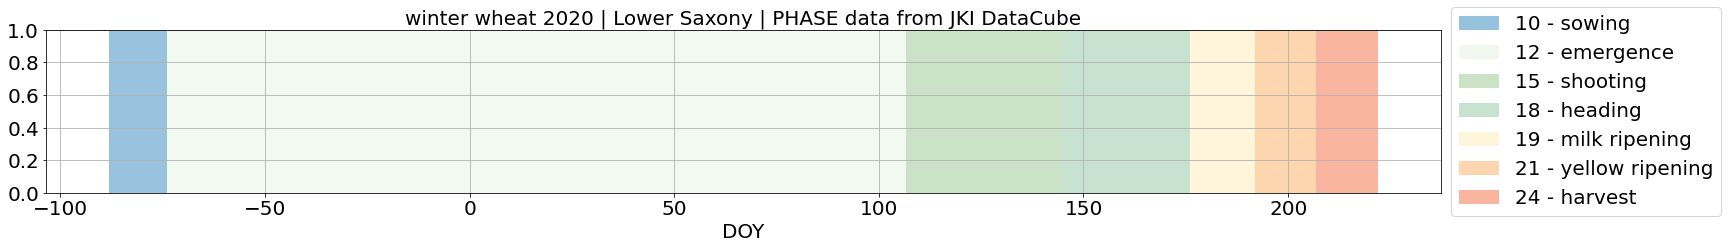

In [11]:
# plot phenological phases
fig, ax = plt.subplots(figsize=(25,3))

# get start of phases from previous year
sow = -1 * (len(days_pre) - np.floor(phases_pre[-2]))
eme = -1 * (len(days_pre) - np.floor(phases_pre[-1]))

ax.axvspan(sow,eme , facecolor= '#3287BD', alpha=0.5, label='10 - sowing')
ax.axvspan(eme,phases_on[0] , facecolor= '#E6F4E3', alpha=0.5, label='12 - emergence')
# ax.axvspan(0, phases[0], facecolor= '#E6F4E3', alpha=0.5, label='emergence')
ax.axvspan(phases_on[0], phases_on[1], facecolor= '#9AC693', alpha=0.5, label='15 - shooting')
ax.axvspan(phases_on[1], phases_on[2], facecolor= '#93C7A3', alpha=0.5, label='18 - heading')
ax.axvspan(phases_on[2], phases_on[3], facecolor= '#FEEDB9', alpha=0.5, label='19 - milk ripening')
ax.axvspan(phases_on[3], phases_on[4], facecolor= '#FDAE61', alpha=0.5, label='21 - yellow ripening')
ax.axvspan(phases_on[4], phases_on[4]+15, facecolor= '#F56D43', alpha=0.5, label='24 - harvest')
ax.grid()
ax.set_xlabel('DOY', fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('winter wheat 2020 | Lower Saxony | PHASE data from JKI DataCube', fontsize=20)
plt.savefig('/media/data_storage/data_storage/florian/projects/DEMO_Rasdaman/winterwheat_field_2020_PHASES.pdf',bbox_inches='tight')
plt.show()



In [12]:
sowing = int(np.floor(phases_pre[-2]))
print('start of sowing (DOY): ', sowing)

start of sowing (DOY):  277


In [13]:
print('number of days from sowing to the last day of the previous year: ', len(days_pre)-sowing)

number of days from sowing to the last day of the previous year:  88


In [14]:
harvest = int(np.ceil(phases_on[4]))+15
print('start of harvest (DOY): {}\nend of harvest set to (DOY): {}'.format(int(np.ceil(phases_on[4])), harvest))

start of harvest (DOY): 207
end of harvest set to (DOY): 222


# Collecting earth observation date (vegetation index: SAVI) from JKI-CODE-DE DataCube

**The following SAVI request might fail, if you do not have credentials.**  
**You have to be a registered user to request Remote Sensing data from JKI Sentinel-2 data cube!!!**

In [15]:
# function to request Sentinel-2 data from S2_GermanyGrid using WCS query
from func_datacube_S2 import get_S2_imagery

# load and prepare polygon
import geopandas as gpd
polygon = gpd.read_file(shp).to_crs('EPSG:32632')
polygon = str(polygon.geometry[0]).replace(' (', '(')

In [16]:
%%time
'''
This cell collects all available Sentinel-2 images available for the agricultural field.
The SAVI will be calculated in case the valid pixel portion is satisfied...
First, the previous year (2019) will be treated from sowing to the last day of the year, then the ongoing (target) year (2020) till the harvest period.
'''
# choose a minimum portion of valid pixels within the image [in %]
valid_pixels = 40

# first loop --> all available images from previous year
dict_field = {}
for i, day in enumerate(tqdm(days_pre[sowing:])):
    # requesing DataCube
    img = get_S2_imagery(
        polygon=polygon,
        layer='S2_GermanyGrid',
        date=day,
        user=credentials.ras_cde_user, 
        pw=credentials.ras_cde_pw,
        host=credentials.ras_cde_host,
        epsg = 32632,
        band1='NIR10',
        band2='R',
        band3='G',
        band_subset=True,
        printout=False,
        get_query=False
    )
    
    # calculating SAVI
    index = calculate_savi(img, valid_pixel_portion=valid_pixels)
    if isinstance(index, list):
        dict_field[day] = [index[0], index[1], i-(len(days_pre)-sowing)]            
    
# second loop --> all available images from previous year
for i, day in enumerate(tqdm(days_on[:harvest])):
    # requesing DataCube
    img = get_S2_imagery(
        polygon=polygon,
        layer='S2_GermanyGrid',
        date=day,
        user=credentials.ras_cde_user, 
        pw=credentials.ras_cde_pw,
        host=credentials.ras_cde_host,
        epsg = 32632,
        band1='NIR10',
        band2='R',
        band3='G',
        band_subset=True,
        printout=False,
        get_query=False
    )
    
    # calculating SAVI
    index = calculate_savi(img, valid_pixel_portion=valid_pixels)
    if isinstance(index, list):
        dict_field[day] = [index[0], index[1], i+1]
    

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 53/88 [00:12<00:05,  5.98it/s]

'/vsimem/ae58417e-3a33-4a40-8ab9-bf3cfc0f2535/ae58417e-3a33-4a40-8ab9-bf3cfc0f2535.tif' not recognized as a supported file format.


  6%|██████████▎                                                                                                                                                                     | 13/222 [00:02<00:34,  6.04it/s]

'/vsimem/c7593299-4771-4bfb-92c5-eb1fe0398c09/c7593299-4771-4bfb-92c5-eb1fe0398c09.tif' not recognized as a supported file format.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 222/222 [00:46<00:00,  4.77it/s]

CPU times: user 6.92 s, sys: 681 ms, total: 7.6 s
Wall time: 1min 6s


In [17]:
print('number of collected images = {} (valid pixel portion >= {} %)'.format(len(dict_field), valid_pixels))

number of collected images = 44 (valid pixel portion >= 40 %)


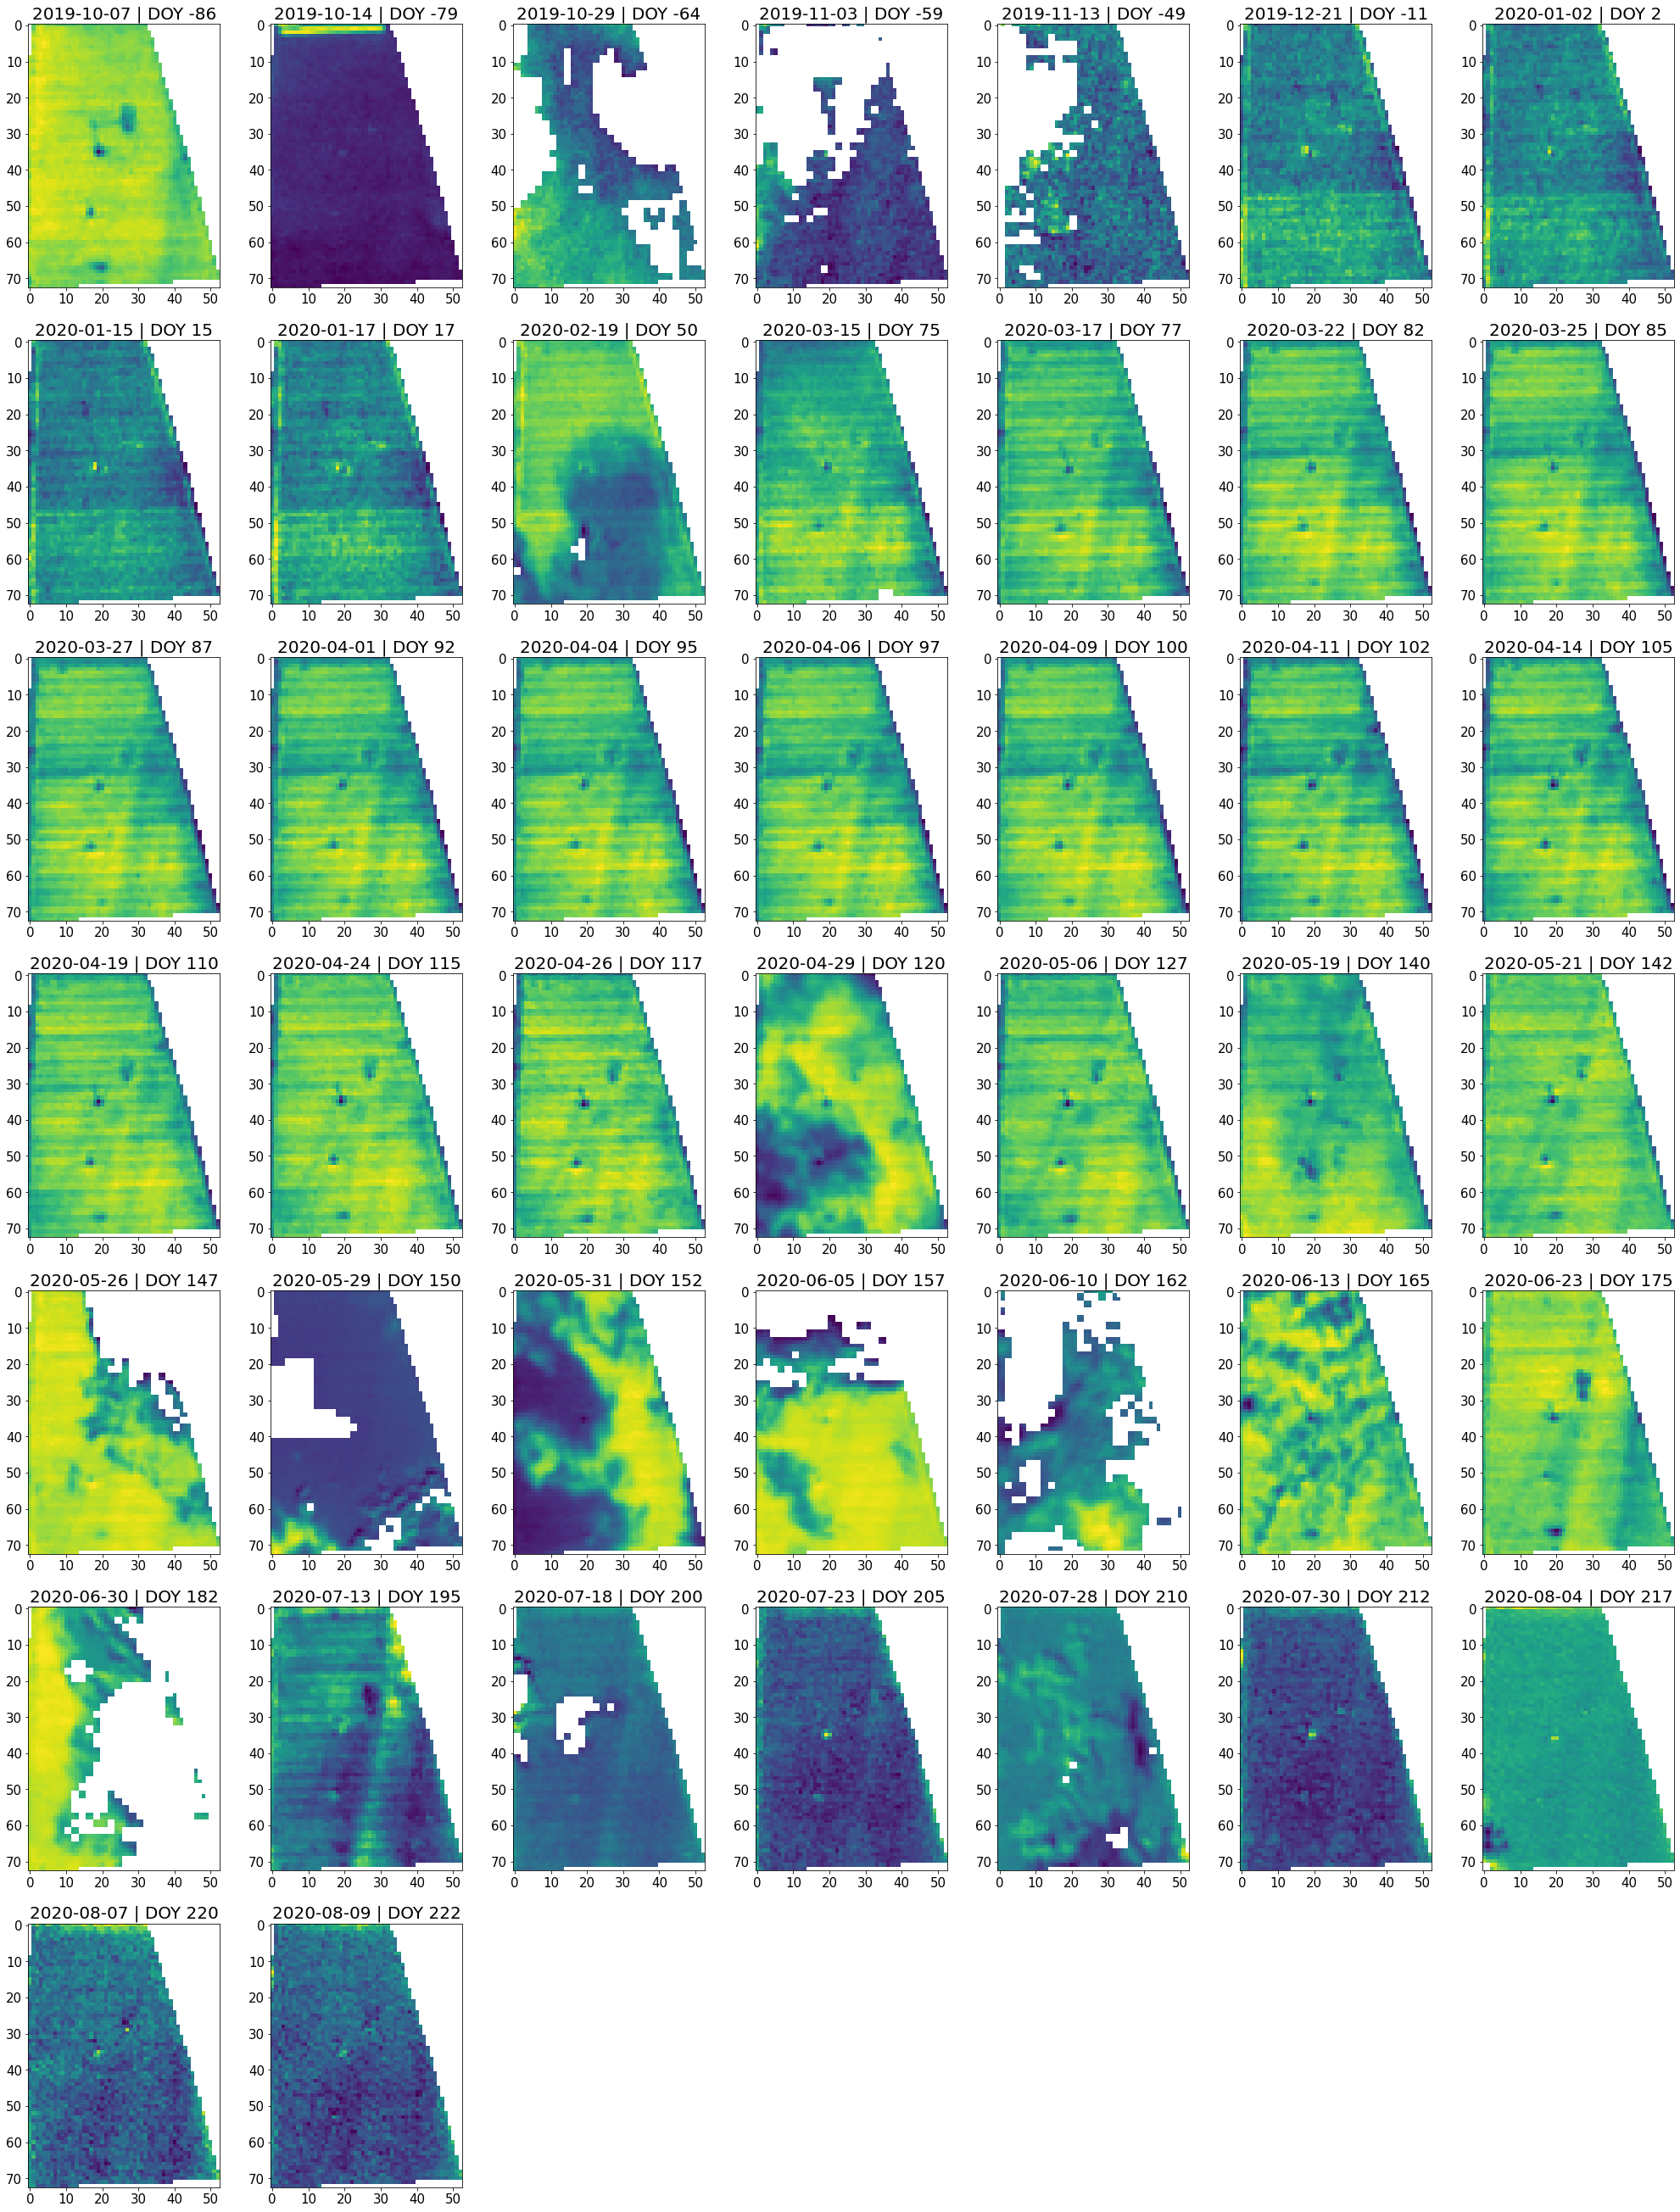

In [18]:
cols = 7
rows = int(np.ceil(len(dict_field)/2))
fig = plt.figure(figsize=(35,150))
for i, date in enumerate(dict_field):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(dict_field[date][0])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(date+' | DOY '+str(dict_field[date][2]), fontsize=20)
plt.savefig('/media/data_storage/data_storage/florian/projects/DEMO_Rasdaman/winterwheat_field_2020_SAVI_dates.pdf',bbox_inches='tight')
plt.show()

# Collecting precipitation data from JKI DataCube
* open precipitation data: 'DWD_Niederschlag'

In [19]:
layer = 'DWD_Niederschlag'

In [20]:
# function to request PHASE data using WCS query
from func_datacube_DWD import get_precipitation_from_point

In [21]:
%%time
# requesing precipitation data from previous year
regnie_pre = get_precipitation_from_point(
    startdate=days_pre[0],
    enddate=days_pre[-1],
    layer=layer,
    easting=easting,
    northing=northing,
    host=credentials.ras_host,
    user=credentials.ras_user,
    pw=credentials.ras_pw,
    epsg=32632,
    printout=False,
    get_query=False,
    use_credentials=False
)
print('annual precipitation sum = {} mm\n'.format(np.sum(regnie_pre)))

annual precipitation sum = 559.4 mm

CPU times: user 178 ms, sys: 4.25 ms, total: 182 ms
Wall time: 912 ms


In [22]:
%%time
# requesing precipitation data from ongoing year
regnie_on = get_precipitation_from_point(
    startdate=days_on[0],
    enddate=days_on[-1],
    layer=layer,
    easting=easting,
    northing=northing,
    host=credentials.ras_host,
    user=credentials.ras_user,
    pw=credentials.ras_pw,
    epsg=32632,
    printout=False,
    get_query=False,
    use_credentials=False
)
print('annual precipitation sum = {} mm\n'.format(np.sum(regnie_on)))

annual precipitation sum = 566.0999999999999 mm

CPU times: user 182 ms, sys: 12.2 ms, total: 194 ms
Wall time: 782 ms


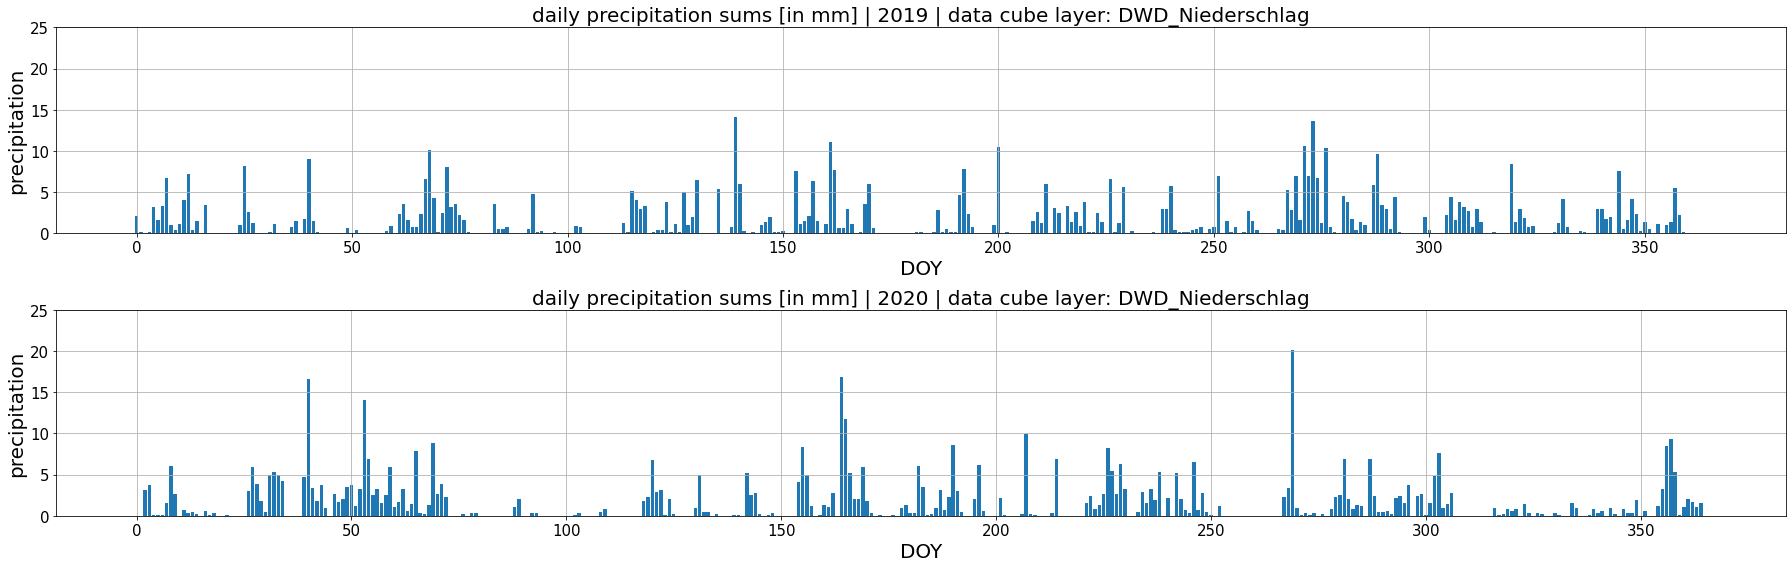

In [23]:
# plotting precipitation of both years

fig, axs = plt.subplots(2, 1, figsize=(25,8))
# plt.figure(figsize=(25,2))
axs[0].bar(range(len(regnie_pre)), regnie_pre)
axs[0].grid()
axs[0].set_title('daily precipitation sums [in mm] | 2019 | data cube layer: {}'.format(layer), fontsize = 20)
axs[0].set_xlabel('DOY', fontsize = 20)
axs[0].set_ylabel('precipitation', fontsize = 20)
axs[0].set_ylim(0,25)
axs[0].xaxis.set_tick_params(labelsize=15)
axs[0].yaxis.set_tick_params(labelsize=15)

axs[1].bar(range(len(regnie_on)), regnie_on)
axs[1].grid()
axs[1].set_title('daily precipitation sums [in mm] | 2020 | data cube layer: {}'.format(layer), fontsize = 20)
axs[1].set_xlabel('DOY', fontsize = 20)
axs[1].set_ylabel('precipitation', fontsize = 20)
axs[1].set_ylim(0,25)
axs[1].xaxis.set_tick_params(labelsize=15)
axs[1].yaxis.set_tick_params(labelsize=15)
fig.tight_layout()

plt.show()

# Plotting all results

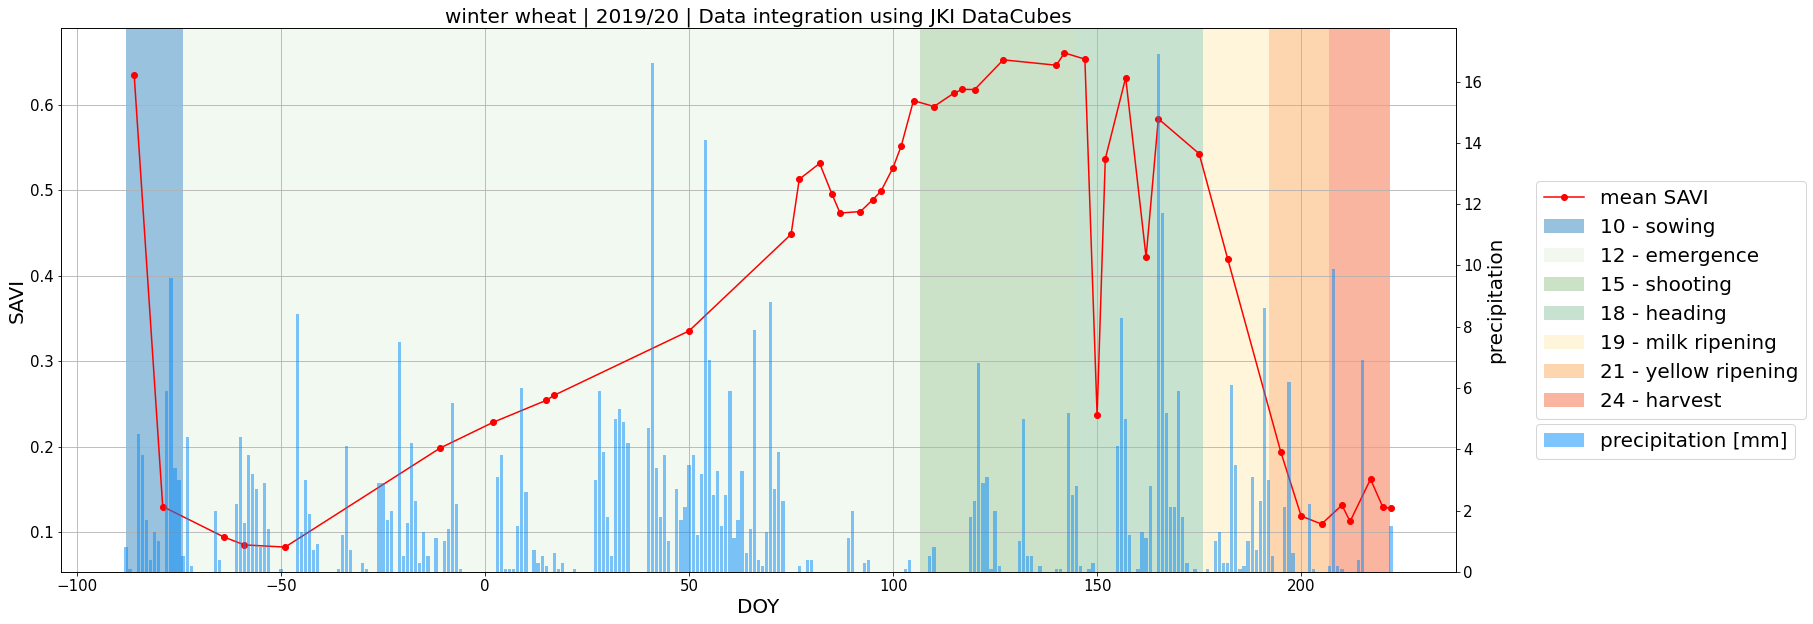

In [24]:
# calculating the mean SAVI of every aquisistion date

fig, ax = plt.subplots(figsize=(25,10))
if 'dict_field' in globals():
    x = [] 
    savi = []
    for day in dict_field:
        x_ = dict_field[day][2]
        savi_ = np.nanmean(dict_field[day][0])
        x.append(x_)
        savi.append(savi_)

    if len(savi) > 0:
        ax.plot(x, savi, 'o-' ,c='red',label='mean SAVI')
    else:
        print('no SAVI data acquired...')
else:
    print('no SAVI data acquired...')
sow = -1 * (len(days_pre) - np.floor(phases_pre[-2]))
eme = -1 * (len(days_pre) - np.floor(phases_pre[-1]))
ax.axvspan(sow,eme , facecolor= '#3287BD', alpha=0.5, label='10 - sowing')
ax.axvspan(eme,phases_on[0] , facecolor= '#E6F4E3', alpha=0.5, label='12 - emergence')
# ax.axvspan(0, phases[0], facecolor= '#E6F4E3', alpha=0.5, label='emergence')
ax.axvspan(phases_on[0], phases_on[1], facecolor= '#9AC693', alpha=0.5, label='15 - shooting')
ax.axvspan(phases_on[1], phases_on[2], facecolor= '#93C7A3', alpha=0.5, label='18 - heading')
ax.axvspan(phases_on[2], phases_on[3], facecolor= '#FEEDB9', alpha=0.5, label='19 - milk ripening')
ax.axvspan(phases_on[3], phases_on[4], facecolor= '#FDAE61', alpha=0.5, label='21 - yellow ripening')
ax.axvspan(phases_on[4], phases_on[4]+15, facecolor= '#F56D43', alpha=0.5, label='24 - harvest')
ax.grid()
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax2 = ax.twinx()
ax2.bar(np.array(range(int(sow),0)), regnie_pre[sowing:],alpha=0.5, color='#038cfc')
ax2.bar(np.arange(len(regnie_on[:harvest]))+1, regnie_on[:harvest],alpha=0.5, color='#038cfc', label='precipitation [mm]')
ax.set_ylabel('SAVI', fontsize=20)
ax.set_xlabel('DOY', fontsize=20)
ax2.legend(loc='center left', bbox_to_anchor=(1.05, 0.24), fontsize=20)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_ylabel('precipitation', fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=20)
plt.title('winter wheat | 2019/20 | Data integration using JKI DataCubes', fontsize=20)
plt.show()
